In [1]:
#Dataset - Red Wine Quality
#https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?datasetId=4458&sortBy=voteCount

### 1. Introductions

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the **reference** [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

### 2. Preparation

In [2]:
#Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Data

df = pd.read_csv("winequality-red.csv")

In [4]:
#The shape of the data

print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (1599, 12)


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Number of unique values in each column

df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [7]:
#Summary

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
#Missing values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3. Exploratory Data Analysis 

<i>Drawing function to show the relationship between features and quality</i> <br>

nrows: number of rows <br>
ncols: number of columns <br>
dataset: data <br>
plot_tpye: bar, box, scatter, distribution, pair <br>
target: target column <br>

In [78]:
def draw_plot(nrows, ncols, dataset, plot_type, target):
    
    if  plot_type == 'pair':
        sns.pairplot(dataset,hue=target ,palette = 'magma')
    
    else:
        fig = plt.figure(figsize=(18,12))
        gs = fig.add_gridspec(nrows,ncols)
        gs.update(wspace=0.5, hspace=0.25)

        #Grid list
        grid_list = [[i,j] for j in range(ncols) for i in range(nrows)]
        grid_list.sort()

        #Ax list
        ax_id = np.arange(0,nrows*ncols,1)
        axes = ['ax'+str(ax_id[ax]) for ax in range(nrows*ncols)]

        for i in range(len(grid_list)):
            axes[i] = fig.add_subplot(gs[grid_list[i][0],grid_list[i][1]])

            background_color = "#ffe6e6"
            color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
            fig.patch.set_facecolor(background_color) 

            axes[i].set_facecolor(background_color) 

            # Title of the plot
            if i == 0:
                for s in ["bottom", "left", "top", "right"]:
                    axes[i].spines[s].set_visible(False)
                    axes[i].tick_params(left=False, bottom=False)
                    axes[i].set_xticklabels([])
                    axes[i].set_yticklabels([])
                    axes[i].text(0.5,0.5,
                         plot_type.capitalize() + ' plot of features \n_________________',
                         horizontalalignment='center',
                         verticalalignment='center',
                         fontsize=16, fontweight='bold',
                         fontfamily='serif',
                         color="#000000")

            # plot of features
            else:
                axes[i].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
                axes[i].set_title(target + " - " + dataset.columns[i-1])
                if plot_type == 'bar':
                    sns.barplot(ax=axes[i],x=target, y= dataset.columns[i-1], data=dataset, palette=color_palette)
                    axes[i].set_xlabel("")
                    axes[i].set_ylabel("")
                elif plot_type == 'box':
                    sns.boxplot(ax=axes[i],x=target, y= dataset.columns[i-1], data=dataset, palette=color_palette)
                    axes[i].set_xlabel("")
                    axes[i].set_ylabel("")
                elif plot_type == 'scatter':
                    sns.scatterplot(ax=axes[i],x=target, y= dataset.columns[i-1], data=dataset, palette=color_palette)
                    axes[i].set_xlabel("")
                    axes[i].set_ylabel("")
                elif plot_type == 'distribution':
                    sns.kdeplot(ax=axes[i], x=dataset.columns[i-1] , hue=target,
                    data=dataset, palette="magma", fill=True, alpha=.5, linewidth=0)
                    axes[i].set_xlabel("")
                    axes[i].set_ylabel("")

                for s in ["top","right","left"]:
                    axes[i].spines[s].set_visible(False)


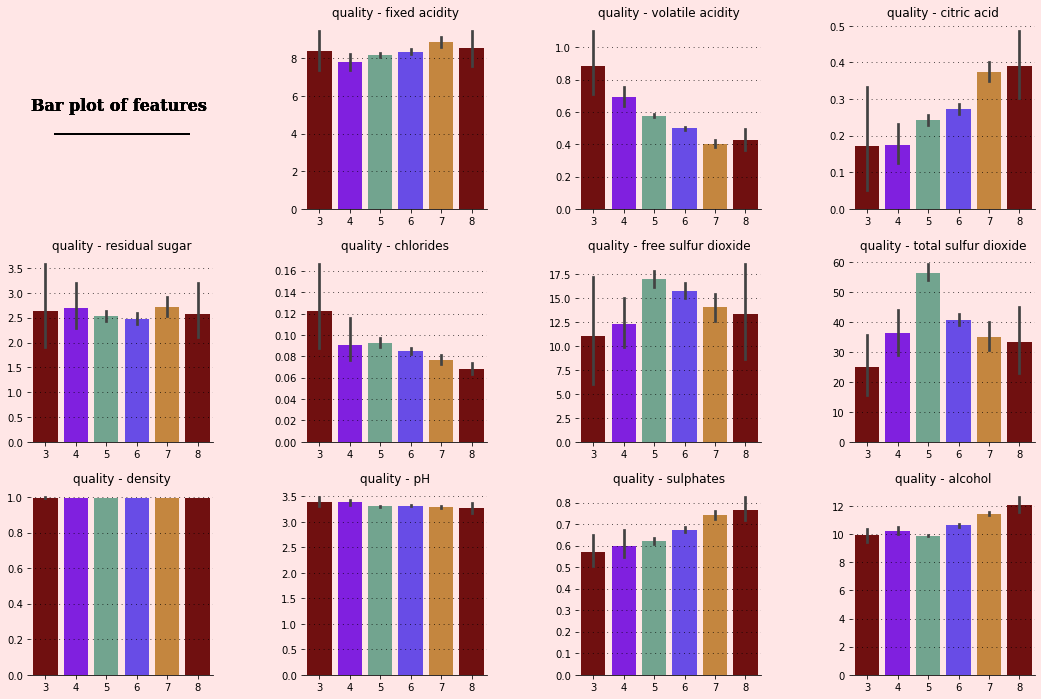

In [81]:
#Bar Plot of features

draw_plot(3, 4, dataset = df, plot_type = 'bar', target = 'quality')

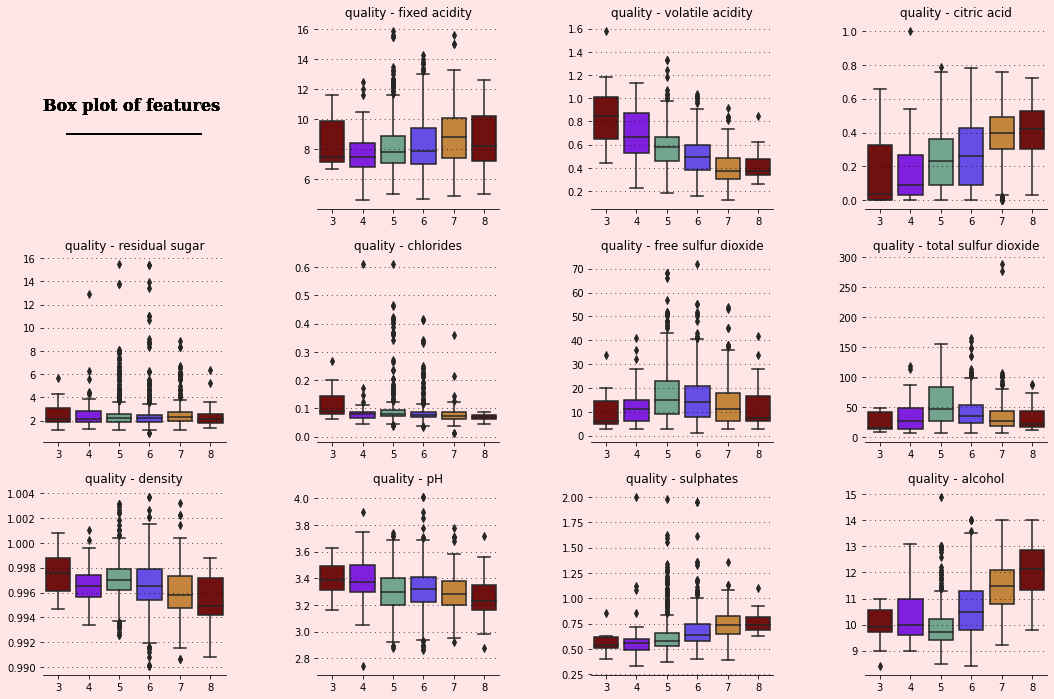

In [82]:
#Box Plot of features

draw_plot(3, 4, dataset = df, plot_type = 'box', target = 'quality')

In [83]:
#Correlation of quality

df.corr()["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

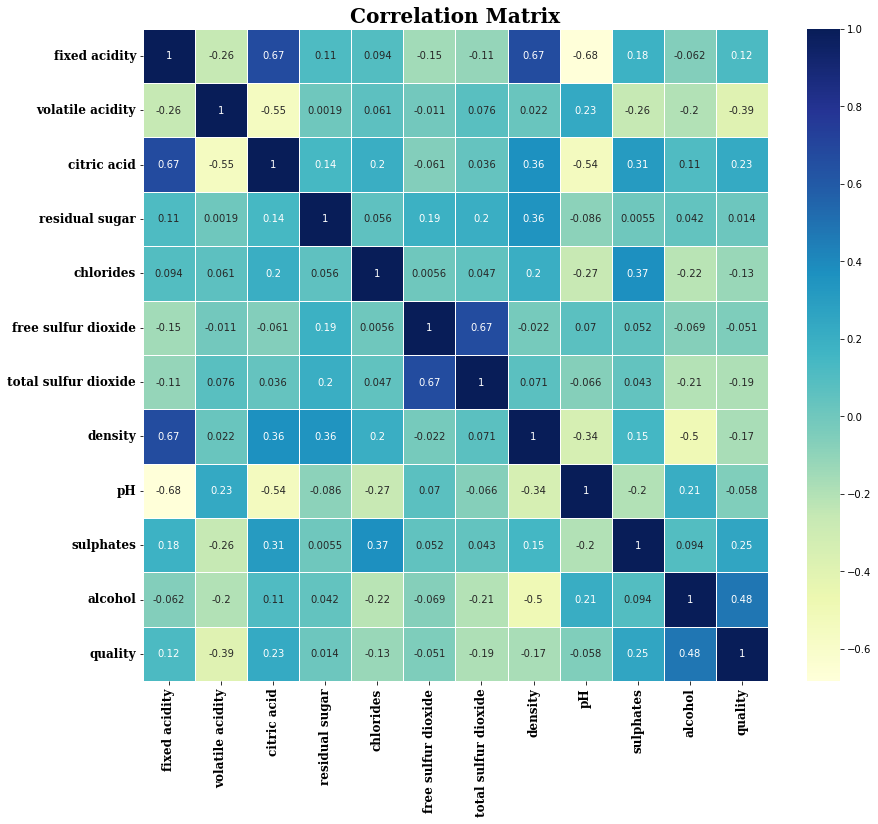

In [84]:
#Correlation matrix of features

df_corr = df.corr()

plt.figure(figsize=(14,12))
plt.xticks(fontsize=12, weight="bold", fontfamily='serif')
plt.yticks(rotation = 90, fontsize=12, weight="bold", fontfamily='serif')
sns.heatmap(df_corr,
            cmap = "YlGnBu",
            annot = True, linewidths=0.8, 
            annot_kws={'size': 10}, linecolor='white')
plt.title("Correlation Matrix", weight="bold",fontsize=20, fontfamily='serif')
plt.show()

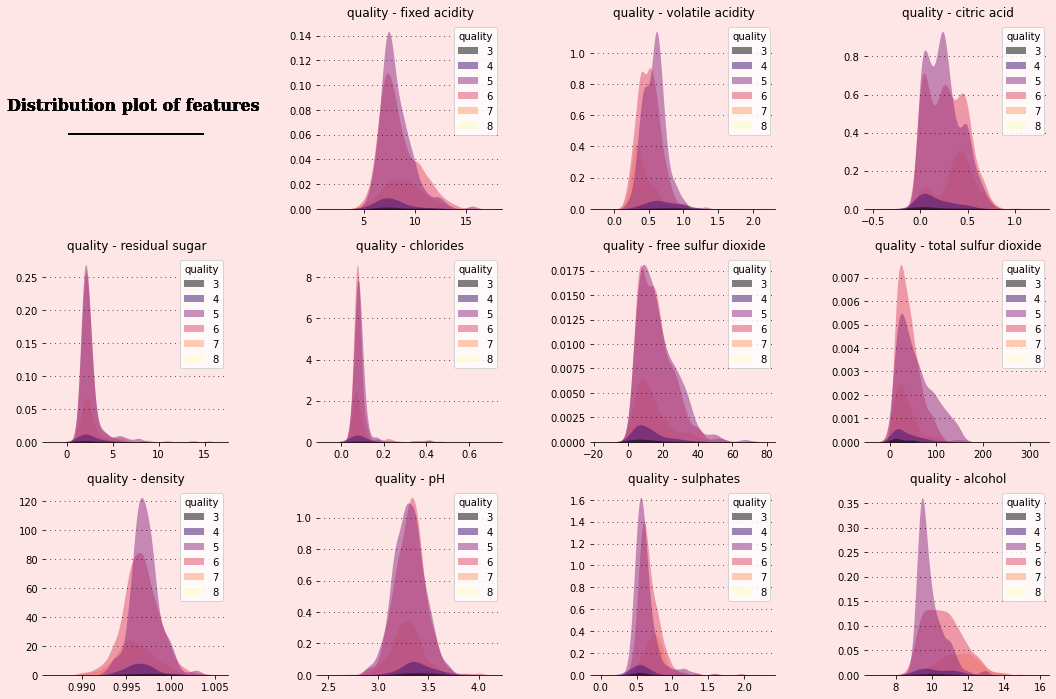

In [85]:
#Distribution of features according to target 

draw_plot(3, 4, dataset = df, plot_type = 'distribution', target = 'quality')

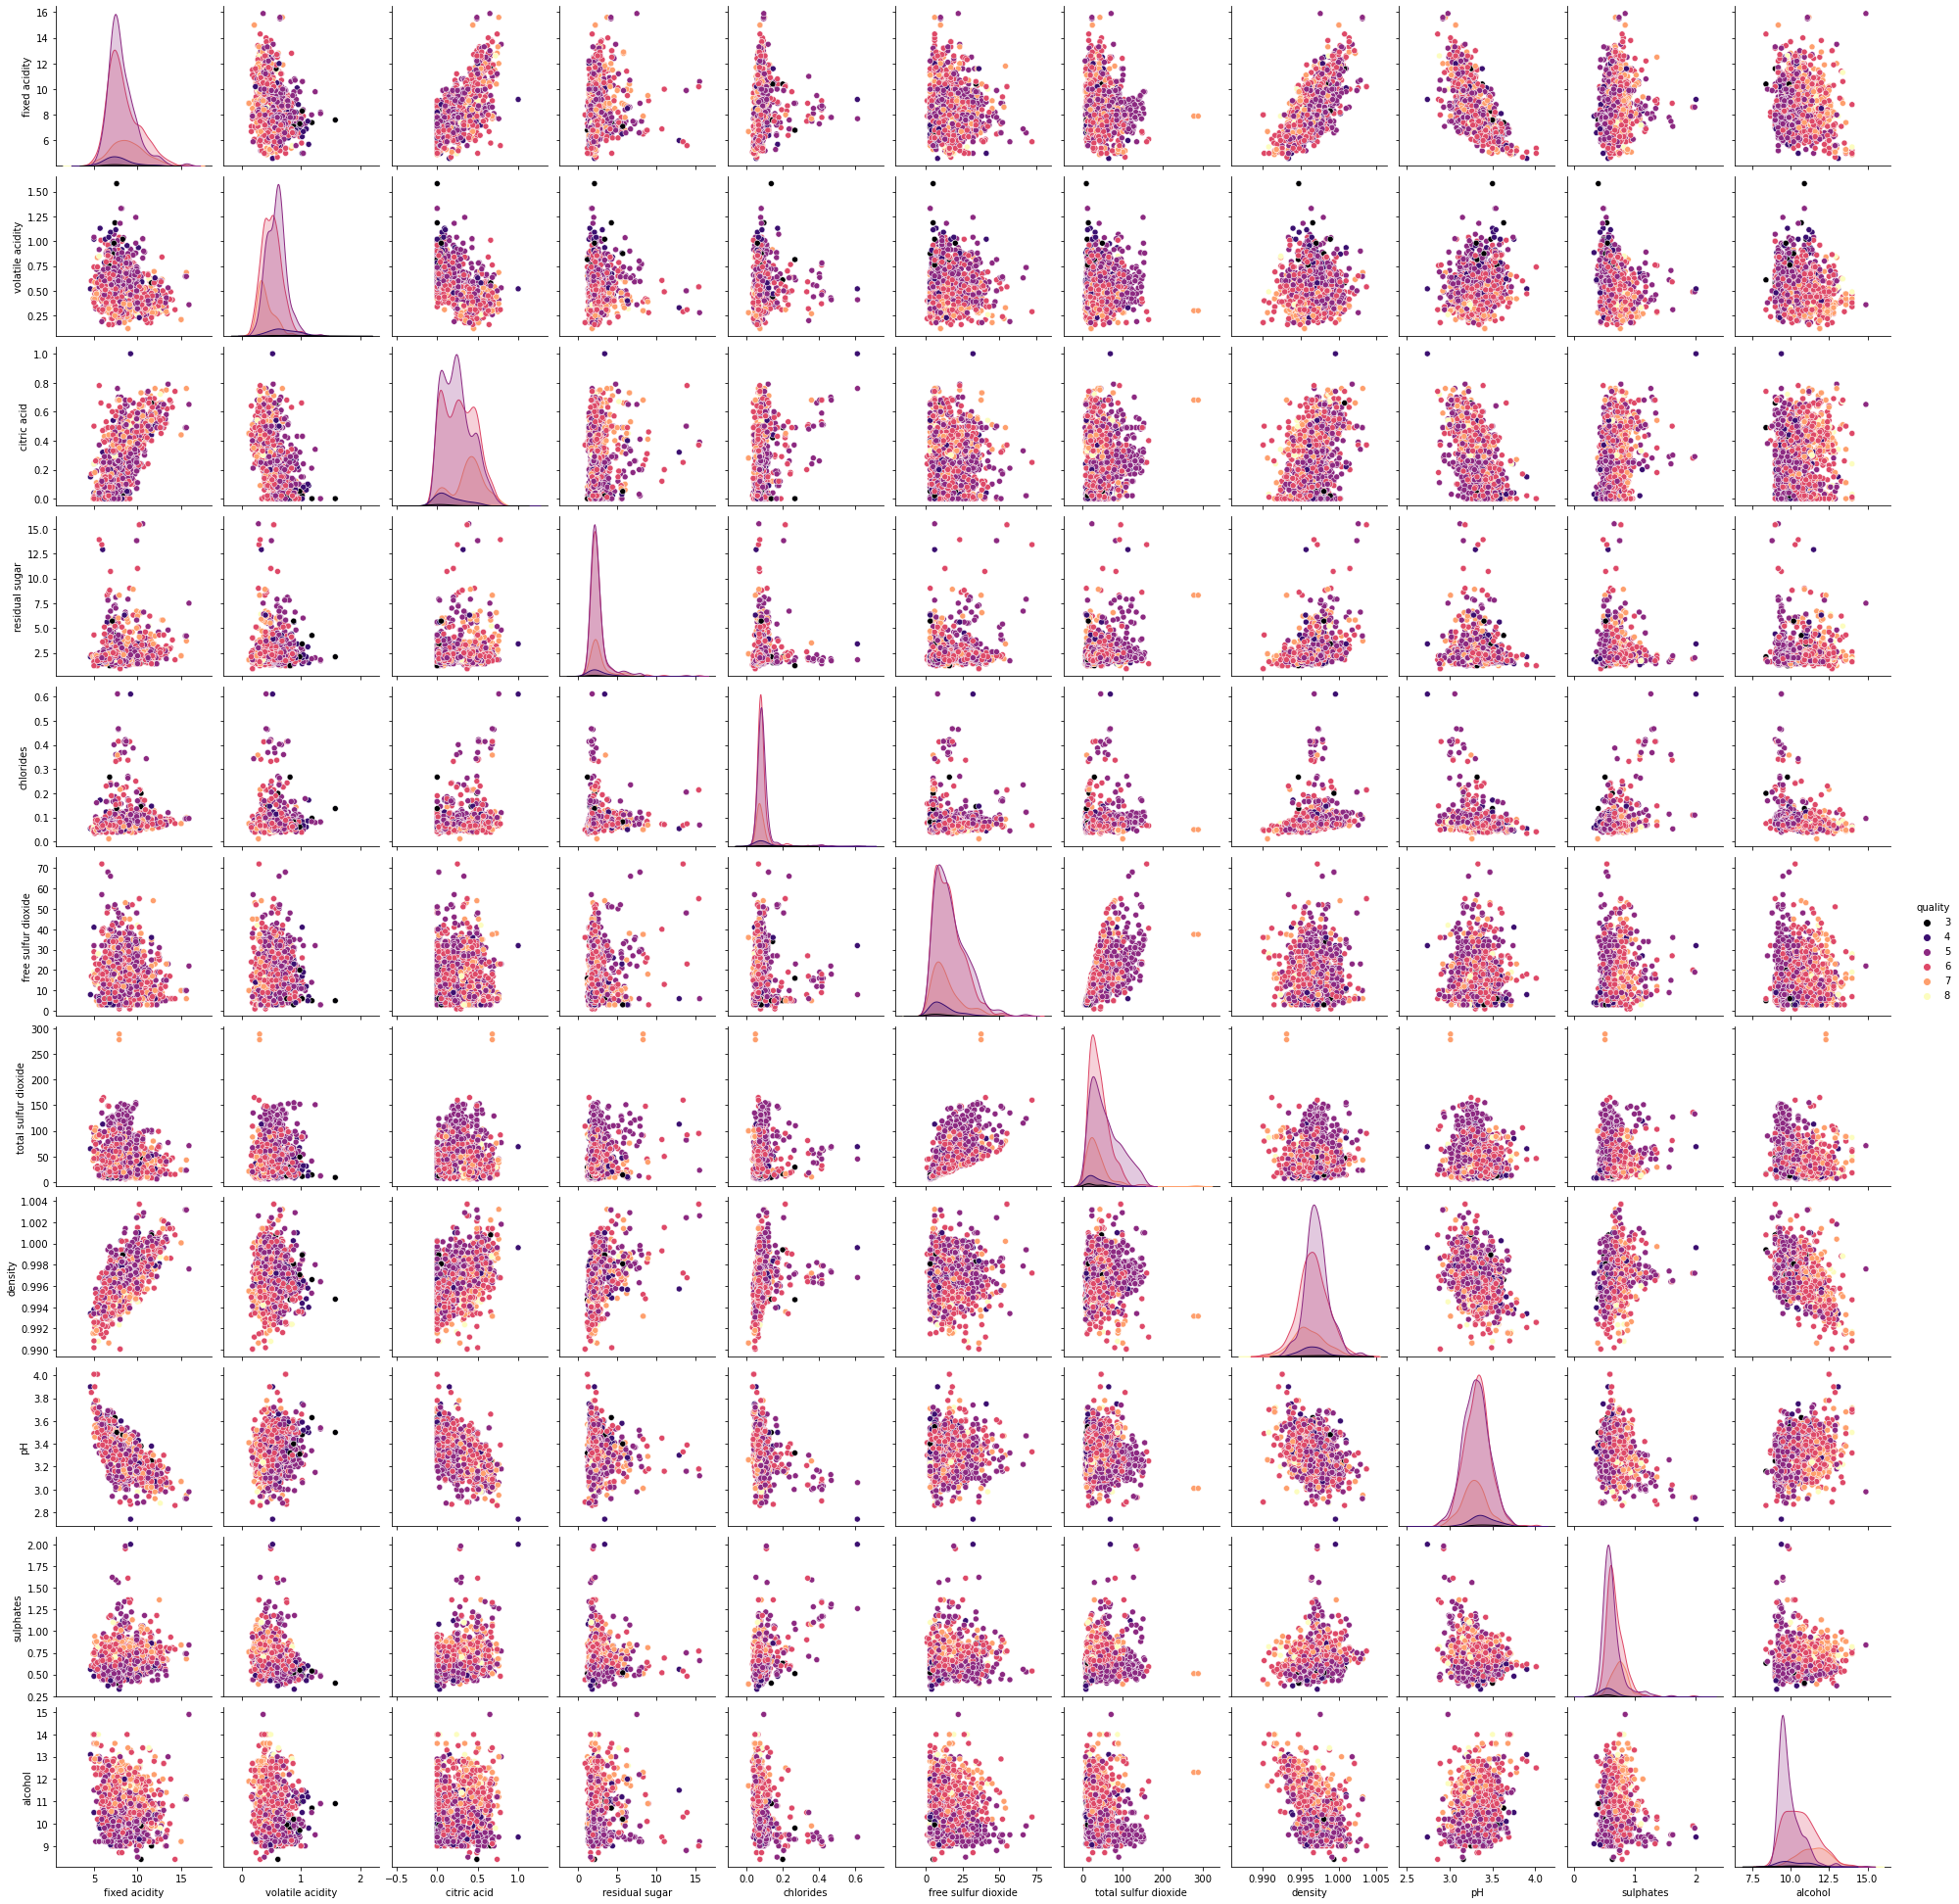

In [79]:
#Pairplot according to target

draw_plot(3, 4, dataset = df, plot_type = 'pair', target = 'quality')

### 4. Data Preprocessing

<h5>Conclusions from the EDA</h5>
<ol>
    <li><p>There are no NaN values in the data.</p></li>
    <li>Relationship according to the bar plot
        <ul>
       <li>The quality of the wine increases as the volatility,pH value and chlorides decrease.</li>
        <li>The quality of the wine increases as citric acid,sulphates and alcohol increase.</li>
        <li>We can say that the ratio of fixed acidity, residual sugar and density does not relationship on the quality of the wine.</li>
        </ul>
        </li>
    <li><p>There are certain outliers in all the features.</p></li>
    <li><p>There is no linear correlation between features according to the heatmap.</p></li>
    <li><p>Looking at the distribution output, we can see that the data are normally distributed. Here we can scale using standardization.</p>
    </li>
    <li><p>We can divide the target column into two separate categories</p></li>
</ol>

In [110]:
# Packages

# Scaling and Label Encoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Train Test Split and cross validation
from sklearn.model_selection import train_test_split, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [88]:
# Divide the 'quality' into two separet categories

df['quality'] = pd.cut(df['quality'], bins=(2,6.5,8), labels=['bad','good'])

In [90]:
# Encoding the quality column 

label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])

df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [91]:
# Defining the features and target column

X = df.drop(['quality'], axis = 1)
Y = df['quality']

# Train and test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

print("The shape of the X_train is ", X_train.shape)
print("The shape of the X_test is ", X_test.shape)
print("The shape of the Y_train is ", Y_train.shape)
print("The shape of the Y_test is ", Y_test.shape)

The shape of the X_train is  (1119, 11)
The shape of the X_test is  (480, 11)
The shape of the Y_train is  (1119,)
The shape of the Y_test is  (480,)


In [94]:
# Scaling the features

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### 5. Modeling 

In [95]:
# Creating model objects 

lr_model = LogisticRegression()
dtc_model = DecisionTreeClassifier()
bayes_model = GaussianNB()
svc_model = SVC()
rfc_model = RandomForestClassifier()

In [97]:
# Train the models

lr_model.fit(X_train, Y_train)
dtc_model.fit(X_train, Y_train)
bayes_model.fit(X_train, Y_train)
svc_model.fit(X_train, Y_train)
rfc_model.fit(X_train, Y_train)

RandomForestClassifier()

In [99]:
# Predictions using the test dataset

lr_predict = lr_model.predict(X_test)
dtc_predict = dtc_model.predict(X_test)
bayes_predict = bayes_model.predict(X_test)
svc_predict = svc_model.predict(X_test)
rfc_predict = rfc_model.predict(X_test)

In [102]:
# Classification reports for models

lr_rep = classification_report(Y_test, lr_predict)
dtc_rep = classification_report(Y_test, dtc_predict)
bayes_rep = classification_report(Y_test, bayes_predict)
svc_rep = classification_report(Y_test, svc_predict)
rfc_rep = classification_report(Y_test, rfc_predict)

In [112]:
# Accuracy scores for models

lr_accuracy = accuracy_score(Y_test, lr_predict)
dtc_accuracy = accuracy_score(Y_test, dtc_predict)
bayes_accuracy = accuracy_score(Y_test, bayes_predict)
svc_accuracy = accuracy_score(Y_test, svc_predict)
rfc_accuracy = accuracy_score(Y_test, rfc_predict)

In [108]:
# Printing the classification reports

print("The classification report of Logistic Regression")
print("-----------------------------------------------------")
print(lr_rep)
print("The classification report of Decision Tree Classifier")
print("-----------------------------------------------------")
print(dtc_rep)
print("The classification report of Naive Bayes model")
print("-----------------------------------------------------")
print(bayes_rep)
print("The classification report of SVC model")
print("-----------------------------------------------------")
print(svc_rep)
print("The classification report of Random Forest Classifier")
print("-----------------------------------------------------")
print(rfc_rep)

The classification report of Logistic Regression
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       420
           1       0.58      0.32      0.41        60

    accuracy                           0.89       480
   macro avg       0.74      0.64      0.67       480
weighted avg       0.87      0.89      0.87       480

The classification report of Decision Tree Classifier
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       420
           1       0.45      0.58      0.51        60

    accuracy                           0.86       480
   macro avg       0.70      0.74      0.71       480
weighted avg       0.88      0.86      0.87       480

The classification report of Naive Bayes model
-----------------------------------------------------
              precision    recall 

In [114]:
# Printing the accuracy scores

print("The test accuracy score of Logistic Regression is ",round(lr_accuracy,4))
print("The test accuracy score of Decision Tree Classifier is ",round(dtc_accuracy,4))
print("The test accuracy score of Naive Bayes model is ",round(bayes_accuracy,4))
print("The test accuracy score of SVC model is ",round(svc_accuracy,4))
print("The test accuracy score of Random Forest Classifier is ",round(rfc_accuracy,4))

The test accuracy score of Logistic Regression is  0.8854
The test accuracy score of Decision Tree Classifier is  0.8604
The test accuracy score of Naive Bayes model is  0.8312
The test accuracy score of SVC model is  0.9
The test accuracy score of Random Forest Classifier is  0.9104


In [123]:
# Cross Validation Scores

lr_model_cv = cross_val_score(estimator=lr_model, X = X_train, y= Y_train, cv = 10)
dtc_model_cv = cross_val_score(estimator=dtc_model, X = X_train, y= Y_train, cv = 10)
bayes_model_cv = cross_val_score(estimator=bayes_model, X = X_train, y= Y_train, cv = 10)
svc_model_cv = cross_val_score(estimator=svc_model, X = X_train, y= Y_train, cv = 10)
rfc_model_cv = cross_val_score(estimator=rfc_model, X = X_train, y= Y_train, cv = 10)

In [124]:
# Printing the cross validation scores

print("The cross validation score of Logistic Regression is ",round(lr_model_cv.mean(),4))
print("The cross validation score of Decision Tree Classifier is ",round(dtc_model_cv.mean(),4))
print("The cross validation score Naive Bayes model is ",round(bayes_model_cv.mean(),4))
print("The cross validation score SVC model is ",round(svc_model_cv.mean(),4))
print("The cross validation score Random Forest Classifier is ",round(rfc_model_cv.mean(),4))

The cross validation score of Logistic Regression is  0.8758
The cross validation score of Decision Tree Classifier is  0.8615
The cross validation score Naive Bayes model is  0.8311
The cross validation score SVC model is  0.8793
The cross validation score Random Forest Classifier is  0.8954
